In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# get root directory
def get_parent_dir(directory):
    return os.path.dirname(directory)
MASTER_PATH = get_parent_dir(os.getcwd())

In [2]:
# read the data csv
clean_meter_df = pd.read_csv(MASTER_PATH + '/input/clean_meter.csv')
clean_meter_df['date'] = pd.to_datetime(clean_meter_df['date'])
clean_meter_df.head()

,date,meter_num,prev_read,curr_read,num_days,reading_type,billed_usage,units
0,2022-10-04,18077,55058,56400,32,ME,-1342.0,kWh
1,2022-10-04,18077,42002,42715,32,ME,713.0,kWh
2,2022-09-02,18077,55635,55058,30,ME,-1423.0,kWh
3,2022-09-02,18077,41458,42002,30,ME,544.0,kWh
4,2022-08-03,18077,52316,53635,29,ME,-1319.0,kWh


<AxesSubplot:title={'center':'Billed Usage over Time'}, xlabel='Date', ylabel='Billed Usage (kWh)'>

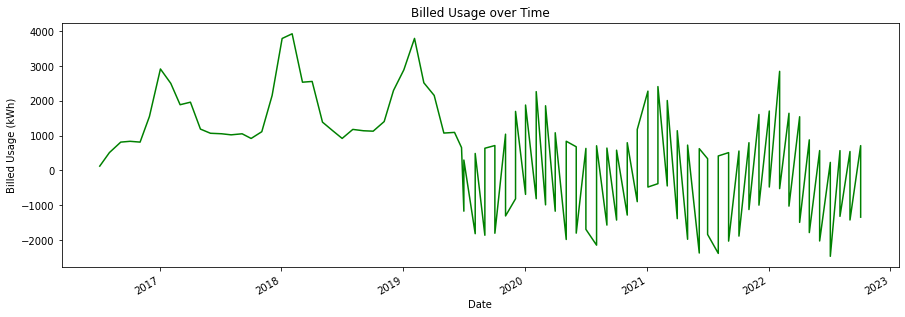

In [34]:
# graph some numerical data.
clean_meter_df.sort_values(by=['date'], inplace=True)
clean_meter_df.plot(x='date', 
    y='billed_usage', 
    figsize=(15, 5), 
    title='Billed Usage over Time',
    xlabel='Date', 
    ylabel='Billed Usage (kWh)', 
    color='green', legend=False)


In [126]:
daily_df = pd.read_csv(MASTER_PATH + '/input/daily.csv')
daily_df['Date & Time'] = pd.to_datetime(daily_df['Date & Time'])
daily_df.insert(1, 'Date', daily_df['Date & Time'].dt.date)
daily_df.insert(2, 'Time', daily_df['Date & Time'].dt.time)
daily_df.insert(3, 'Month', daily_df['Date & Time'].dt.month)
daily_df.sort_values(by=['Date & Time'], inplace=True)
# remove the duplicate date & time rows
daily_df.drop_duplicates(subset=['Date & Time'], inplace=True)
daily_df

,Date & Time,Date,Time,Month,Usage [kW],Generation [kW],Grid [kW],EV Charger [kW],Inverter 1 [kW],Inverter 1+ [kW],Inverter 2 [kW],Inverter 2+ [kW],Fridge [kW],Dryer [kW],HVAC [kW],Water Heater [kW]
1230,2019-06-21 12:30:00,2019-06-21,12:30:00,6,0.628825,-0.000015,0.628806,-0.003442,-0.000001,0.000007,-0.000014,0.000012,-0.039257,-0.000000,-0.000000,-0.000000
1229,2019-06-22 12:30:00,2019-06-22,12:30:00,6,1.281439,-0.000029,1.281422,-0.003379,-0.000007,0.000007,-0.000023,0.000011,-0.062728,-0.000000,-0.000000,-0.000000
1228,2019-06-23 12:30:00,2019-06-23,12:30:00,6,1.608331,-0.000030,1.608313,-0.003330,-0.000006,0.000007,-0.000023,0.000012,-0.066147,-0.002446,-0.016858,-0.024353
1227,2019-06-24 12:30:00,2019-06-24,12:30:00,6,1.514244,2.487238,-0.977618,-0.003591,1.293538,1.295916,1.193699,1.195946,-0.066760,-0.141535,-0.268556,-0.291840
1226,2019-06-25 12:30:00,2019-06-25,12:30:00,6,1.652801,4.170147,-2.521511,-0.632324,2.150185,2.152351,2.019962,2.021961,-0.054014,-0.003260,-0.221052,-0.228592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-10-28 12:30:00,2022-10-28,12:30:00,10,0.620839,1.592395,-0.977674,-0.003227,0.981486,0.984666,0.610909,0.613847,-0.040734,-0.002617,-0.135058,-0.141477
3,2022-10-29 12:30:00,2022-10-29,12:30:00,10,0.478323,1.688105,-1.215907,-0.003219,1.027091,1.030242,0.661014,0.663989,-0.032187,-0.002530,-0.051345,-0.075519
2,2022-10-30 12:30:00,2022-10-30,12:30:00,10,2.685775,0.969837,1.709670,-0.003155,0.595876,0.599126,0.373961,0.376980,-0.047340,-0.152211,-0.536116,-0.564167
1,2022-10-31 12:30:00,2022-10-31,12:30:00,10,2.765420,0.685586,2.073597,-0.003130,0.430179,0.433378,0.255406,0.258445,-0.048814,-0.328772,-0.555235,-0.220828


In [146]:
daily_df_dupe = daily_df.copy()
daily_df_dupe.drop(columns=['Date & Time', 'Time', 'Month'], inplace=True)
daily_dfm = daily_df_dupe.melt('Date', var_name='cols', value_name='vals')
daily_dfm

,Date,cols,vals
0,2019-06-21,Usage [kW],0.628825
1,2019-06-22,Usage [kW],1.281439
2,2019-06-23,Usage [kW],1.608331
3,2019-06-24,Usage [kW],1.514244
4,2019-06-25,Usage [kW],1.652801
...,...,...,...
14755,2022-10-28,Water Heater [kW],-0.141477
14756,2022-10-29,Water Heater [kW],-0.075519
14757,2022-10-30,Water Heater [kW],-0.564167
14758,2022-10-31,Water Heater [kW],-0.220828


In [131]:
from meteostat import Point, Daily
start = daily_df['Date & Time'].min() - pd.Timedelta(days=1)
end = daily_df['Date & Time'].max()
print(f'Starting Date: {start}, Ending Date: {end}')

# get historical weather data for Blacksburg, VA
blacksburg = Point(37.2296, -80.4139)
weather = Daily(blacksburg, start, end)
weather_df = weather.fetch()
weather_df = weather_df.reset_index().rename(columns={'index':'dates'})
weather_df['time'] = weather_df['time'].dt.date
weather_df.rename(columns={'time':'Date'}, inplace=True)
weather_df

Starting Date: 2019-06-20 12:30:00, Ending Date: 2022-11-01 12:30:00


,Date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2019-06-21,20.7,18.6,24.1,NaN,NaN,NaN,17.0,NaN,NaN,NaN
1,2019-06-22,18.9,15.3,22.7,NaN,NaN,NaN,2.2,NaN,NaN,NaN
2,2019-06-23,19.9,14.0,25.4,NaN,NaN,NaN,2.9,NaN,NaN,NaN
3,2019-06-24,23.5,16.8,30.1,NaN,NaN,NaN,4.5,NaN,NaN,NaN
4,2019-06-25,22.0,17.9,25.5,NaN,NaN,NaN,7.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1225,2022-10-28,9.0,3.6,14.4,0.0,NaN,47.0,5.0,NaN,1029.9,NaN
1226,2022-10-29,11.1,9.0,15.6,0.0,NaN,79.0,6.7,NaN,1029.9,NaN
1227,2022-10-30,11.6,9.2,15.1,0.5,NaN,87.0,6.4,NaN,1023.8,NaN
1228,2022-10-31,12.0,10.5,13.0,15.5,NaN,54.0,3.3,NaN,1019.0,NaN


<AxesSubplot:xlabel='Date'>

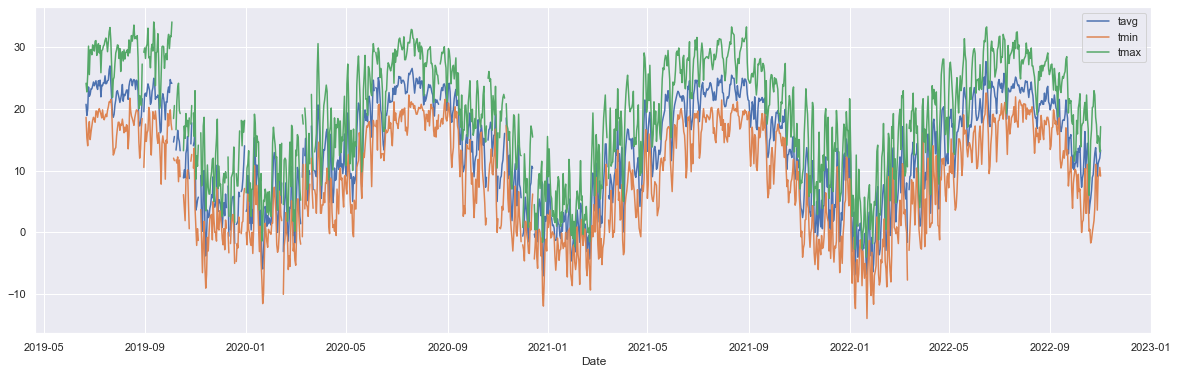

In [137]:
weather_df.plot(x='Date', y=['tavg', 'tmin', 'tmax'])

In [134]:
# merge the weather data with the meter data
daily_with_weather_df = pd.merge(daily_df, weather_df, on='Date', how='left')
daily_with_weather_df

,Date & Time,Date,Time,Month,Usage [kW],Generation [kW],Grid [kW],EV Charger [kW],Inverter 1 [kW],Inverter 1+ [kW],...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2019-06-21 12:30:00,2019-06-21,12:30:00,6,0.628825,-0.000015,0.628806,-0.003442,-0.000001,0.000007,...,20.7,18.6,24.1,NaN,NaN,NaN,17.0,NaN,NaN,NaN
1,2019-06-22 12:30:00,2019-06-22,12:30:00,6,1.281439,-0.000029,1.281422,-0.003379,-0.000007,0.000007,...,18.9,15.3,22.7,NaN,NaN,NaN,2.2,NaN,NaN,NaN
2,2019-06-23 12:30:00,2019-06-23,12:30:00,6,1.608331,-0.000030,1.608313,-0.003330,-0.000006,0.000007,...,19.9,14.0,25.4,NaN,NaN,NaN,2.9,NaN,NaN,NaN
3,2019-06-24 12:30:00,2019-06-24,12:30:00,6,1.514244,2.487238,-0.977618,-0.003591,1.293538,1.295916,...,23.5,16.8,30.1,NaN,NaN,NaN,4.5,NaN,NaN,NaN
4,2019-06-25 12:30:00,2019-06-25,12:30:00,6,1.652801,4.170147,-2.521511,-0.632324,2.150185,2.152351,...,22.0,17.9,25.5,NaN,NaN,NaN,7.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2022-10-28 12:30:00,2022-10-28,12:30:00,10,0.620839,1.592395,-0.977674,-0.003227,0.981486,0.984666,...,9.0,3.6,14.4,0.0,NaN,47.0,5.0,NaN,1029.9,NaN
1226,2022-10-29 12:30:00,2022-10-29,12:30:00,10,0.478323,1.688105,-1.215907,-0.003219,1.027091,1.030242,...,11.1,9.0,15.6,0.0,NaN,79.0,6.7,NaN,1029.9,NaN
1227,2022-10-30 12:30:00,2022-10-30,12:30:00,10,2.685775,0.969837,1.709670,-0.003155,0.595876,0.599126,...,11.6,9.2,15.1,0.5,NaN,87.0,6.4,NaN,1023.8,NaN
1228,2022-10-31 12:30:00,2022-10-31,12:30:00,10,2.765420,0.685586,2.073597,-0.003130,0.430179,0.433378,...,12.0,10.5,13.0,15.5,NaN,54.0,3.3,NaN,1019.0,NaN


In [152]:
daily_with_weather_df.to_csv(MASTER_PATH + '/input/daily_with_weather.csv', index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'kW')

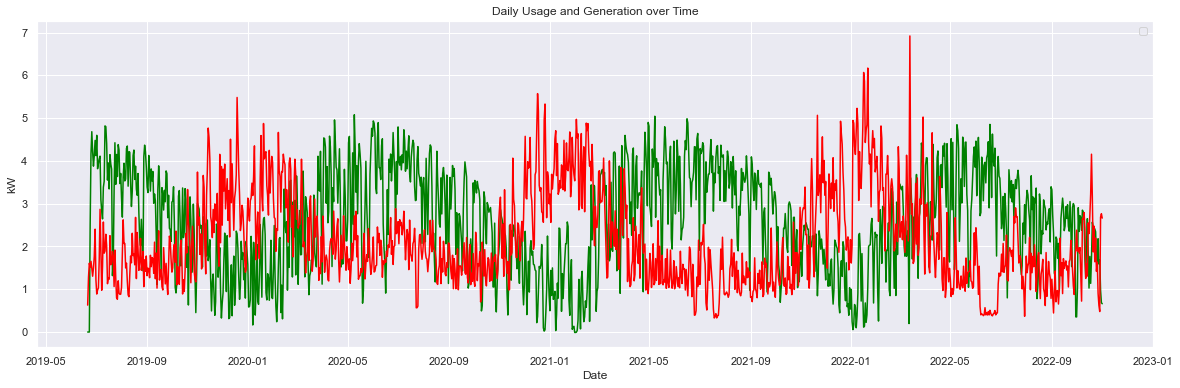

In [154]:
daily_df.sort_values(by=['Date'], inplace=True)
plt.rcParams["figure.figsize"] = (20,6)
sns.lineplot(x='Date', y='Generation [kW]', data=daily_df, color='green')
sns.lineplot(x='Date', y='Usage [kW]', data=daily_df, color='red')
plt.legend()
plt.title('Daily Usage and Generation over Time')
plt.xlabel('Date')
plt.ylabel('kW')


Text(0, 0.5, 'All Columns (kW)')

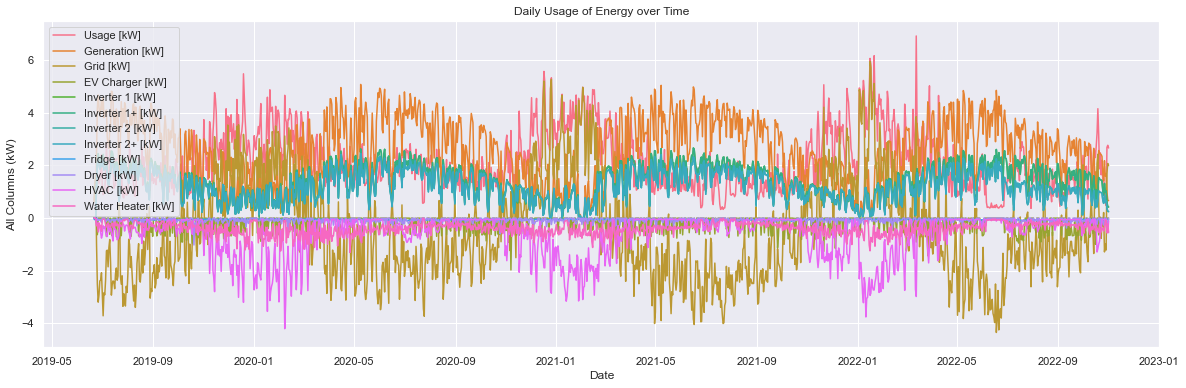

In [155]:
daily_df.sort_values(by=['Date'], inplace=True)
plt.rcParams["figure.figsize"] = (20,6)
sns.lineplot(x="Date", y="vals", hue='cols', data=daily_dfm)
plt.title('Daily Usage of Energy over Time')
plt.xlabel('Date')
plt.ylabel('All Columns (kW)')


<AxesSubplot:xlabel='Generation [kW]', ylabel='Usage [kW]'>

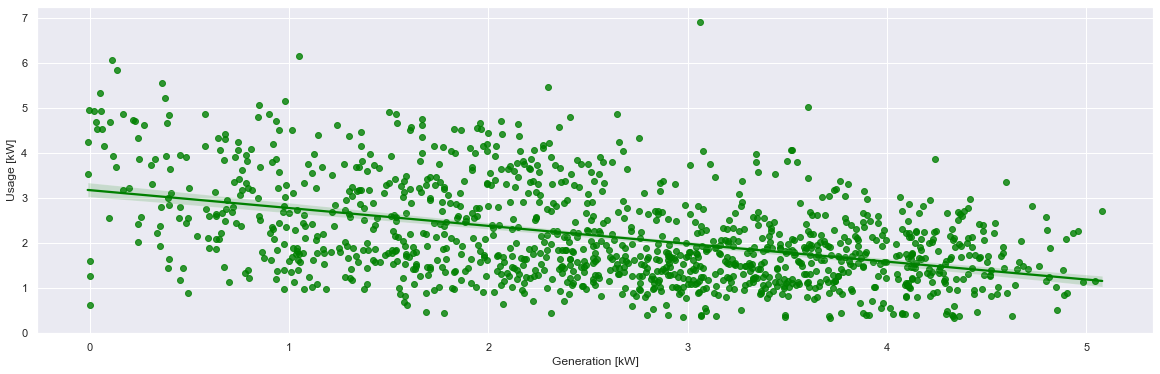

In [153]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,6)})
sns.regplot(x='Generation [kW]', y='Usage [kW]', data=daily_with_weather_df, color='green')